In [3]:
import pandas as pd
data = pd.read_csv('compounds_with_safety.csv')

In [4]:
data.shape

(6373, 55)

In [5]:
data.columns

Index(['compound_name', 'clinical_phase', 'disease_area', 'indication',
       'mechanism_of_action', 'cf_max_score', 'cf_avg_score', 'cf_top_pose',
       'docking_max_score', 'docking_avg_score', 'docking_top_pose',
       'safety_Aurora kinase A', 'safety_Bile Salt Export Pump model 2',
       'safety_Caspase 3', 'safety_Cathepsin L1', 'safety_hERG_pIC50',
       'safety_KCNA5', 'safety_Muscarinic acetylcholine receptor M1',
       'safety_Muscarinic acetylcholine receptor M3', 'hERG_pIC50', 'KCNA5',
       'pk_Human microsomal clearance model 2', 'chem_a_acc', 'chem_a_don',
       'chem_chi0', 'chem_chi1', 'chem_chi0_c', 'chem_chi1_c', 'chem_kier1',
       'chem_lip_acc', 'chem_npr1', 'chem_peoe_pcplus', 'chem_peoe_vsaplus0',
       'chem_peoe_vsaplus2', 'chem_peoe_vsaplus4', 'chem_peoe_vsaplus6',
       'chem_peoe_vsaminus1', 'chem_peoe_vsaminus3', 'chem_peoe_vsaminus5',
       'chem_pmi', 'chem_pmi2', 'chem_pmix', 'chem_pmiz', 'chem_slogp',
       'chem_slogp_vsa1', 'chem_slogp_v

In [6]:
data_herg = data.sort_values(by = 'hERG_pIC50', ascending = True)[:200]
data_aurora = data.sort_values(by = 'safety_Aurora kinase A', ascending = True)[:200]
data_kcn = data.sort_values(by = 'safety_KCNA5', ascending = False)[:200]

In [7]:
# ranked by docking
data_herg = data_herg.sort_values(by = 'docking_avg_score', ascending = True)
data_aurora = data_aurora.sort_values(by = 'docking_avg_score', ascending = True)
data_kcn = data_kcn.sort_values(by = 'docking_avg_score', ascending = True)

In [8]:
# choose top 100 from three

combined = pd.concat([data_herg, data_aurora, data_kcn], ignore_index=True)
combined = combined.drop_duplicates()
combined = combined[:100]

In [9]:
combined

,compound_name,clinical_phase,disease_area,indication,mechanism_of_action,cf_max_score,cf_avg_score,cf_top_pose,docking_max_score,docking_avg_score,...,chem_slogp_vsa3,chem_slogp_vsa5,chem_slogp_vsa7,chem_slogp_vsa9,chem_smr_vsa0,chem_smr_vsa2,chem_smr_vsa4,chem_smr_vsa6,chem_tpsa,cv_safety_score
0,dicoumarol,Launched,hematology,deep vein thrombosis (DVT),NADPH inhibitor,6.78,6.207,5.93,-7.0,-7.16,...,0.00,6.37,141.15,10.49,133.09,0.00,0.00,15.49,98.72,4.360
1,deferasirox,Launched,hematology,iron overload,chelating agent,6.80,5.801,5.95,-6.7,-6.84,...,0.00,0.00,225.50,10.49,66.55,0.00,13.78,1.46,111.30,5.095
2,omtriptolide,Preclinical,NaN,NaN,ERK1 and ERK2 phosphorylation inhibitor,8.05,6.352,6.62,-6.4,-6.66,...,20.93,6.37,0.00,99.98,169.27,8.82,0.00,37.88,130.32,4.905
3,dehydrocholate,Preclinical,NaN,NaN,NaN,7.68,5.334,4.04,-6.2,-6.54,...,0.00,0.00,0.00,99.98,138.13,26.46,0.00,18.53,91.34,4.865
4,dehydrocholate-acid,Preclinical,NaN,NaN,NaN,7.68,5.334,4.04,-6.2,-6.54,...,0.00,0.00,0.00,99.98,138.13,26.46,0.00,18.53,91.34,4.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,nadifloxacin,Launched,dermatology,acne vulgaris (AV),bacterial DNA gyrase inhibitor,6.50,5.301,5.58,-4.9,-5.04,...,36.88,22.05,34.86,53.80,90.41,15.37,5.51,44.03,83.91,5.045
96,difloxacin,Launched,dermatology,acne vulgaris (AV),bacterial DNA gyrase inhibitor,6.50,5.301,5.58,-4.9,-5.04,...,36.88,22.05,34.86,53.80,90.41,15.37,5.51,44.03,83.91,5.045
97,tavilermide,Phase 3,NaN,NaN,tyrosine kinase partial agonist,5.83,5.178,4.88,-4.8,-5.03,...,108.74,0.00,52.93,8.00,235.63,155.88,2.76,81.77,279.35,4.520
98,ramipril,Launched,cardiology,hypertension,angiotensin converting enzyme inhibitor,5.93,4.950,3.92,-4.9,-5.03,...,20.93,18.87,88.22,66.65,125.27,22.42,0.00,35.39,98.77,5.105


In [10]:
compound_list = [
    "andarine", "AZD2461", "BMS-906024", "candesartan", "CPI-0610", "cycloheximide",
    "dienogest", "epinastine", "evodiamine", "hypericin", "I-BRD9", "ilaprazole",
    "indiplon", "INT-767", "ITX3", "K-strophanthidin", "L-701324", "LY2183240",
    "MK-1064", "monensin", "narasin", "navarixin", "obeticholic-acid",
    "olmesartan-medoxomil", "palmatine-chloride", "perfluorodecalin",
    "PF-04217903", "PF-477736", "PIK-293", "resmetirom", "RU-28318",
    "sanguinarium-chloride", "SCH-58261", "SP-100030", "SPP86", "sulfinpyrazone",
    "sulindac", "TAK-063", "TC-S-7009", "TEPP-46", "tivantinib"
]

# Filter for found and not found
found_df = combined[combined['compound_name'].isin(compound_list)].copy()
found_names = set(found_df['compound_name'])
not_found_names = [name for name in compound_list if name not in found_names]

# Create not found DataFrame
not_found_df = pd.DataFrame(not_found_names, columns=['compound_name'])

In [11]:
found_df

,compound_name,clinical_phase,disease_area,indication,mechanism_of_action,cf_max_score,cf_avg_score,cf_top_pose,docking_max_score,docking_avg_score,...,chem_slogp_vsa3,chem_slogp_vsa5,chem_slogp_vsa7,chem_slogp_vsa9,chem_smr_vsa0,chem_smr_vsa2,chem_smr_vsa4,chem_smr_vsa6,chem_tpsa,cv_safety_score
21,candesartan,Launched,cardiology,congestive heart failure,angiotensin receptor antagonist,7.8,5.861,5.02,-5.9,-6.14,...,20.93,0.0,210.25,56.15,66.55,0.0,16.17,22.39,105.85,5.085


In [12]:
not_found_df

,compound_name
0,andarine
1,AZD2461
2,BMS-906024
3,CPI-0610
4,cycloheximide
5,dienogest
6,epinastine
7,evodiamine
8,hypericin
9,I-BRD9


In [13]:
found_df = data[data['compound_name'].isin(compound_list)].copy()
found_names = set(found_df['compound_name'])
not_found_names = [name for name in compound_list if name not in found_names]

# Create not found DataFrame
not_found_df = pd.DataFrame(not_found_names, columns=['compound_name'])

In [14]:
found_df

,compound_name,clinical_phase,disease_area,indication,mechanism_of_action,cf_max_score,cf_avg_score,cf_top_pose,docking_max_score,docking_avg_score,...,chem_slogp_vsa3,chem_slogp_vsa5,chem_slogp_vsa7,chem_slogp_vsa9,chem_smr_vsa0,chem_smr_vsa2,chem_smr_vsa4,chem_smr_vsa6,chem_tpsa,cv_safety_score
586,indiplon,Phase 3,NaN,NaN,benzodiazepine receptor agonist,7.91,7.006,7.16,-5.9,-6.07,...,2.76,49.68,156.53,69.69,47.72,5.88,5.08,10.95,67.56,5.905
769,sulfinpyrazone,Launched,rheumatology,gout,uricosuric blocker,7.90,6.700,7.31,-6.3,-6.45,...,17.23,1.55,264.65,5.51,71.81,11.97,5.51,27.75,76.90,5.355
1116,ilaprazole,Launched,gastroenterology,gastroesophageal reflux disease (GERD),proton pump inhibitor,8.09,6.908,8.09,-6.0,-6.21,...,0.00,36.08,164.55,55.80,24.09,17.48,7.05,0.00,92.01,5.515
1204,SPP86,Preclinical,NaN,NaN,receptor tyrosine protein kinase inhibitor,8.32,6.542,7.30,-5.8,-6.09,...,34.06,0.00,109.29,68.98,0.00,0.00,6.62,0.00,69.62,5.760
1216,LY2183240,Preclinical,NaN,NaN,FAAH inhibitor FAAH reuptake inhibitor,8.66,7.416,5.36,-6.7,-6.90,...,0.00,84.66,165.16,23.86,23.86,0.00,6.37,4.83,63.91,5.485
1316,monensin,Launched,infectious disease,gastrointestinal parasites,bacterial permeability inducer,7.60,6.112,6.05,-5.9,-6.33,...,20.93,35.38,0.00,266.61,132.54,26.46,0.00,22.39,156.20,5.520
1587,MK-1064,Phase 1,NaN,NaN,orexin receptor antagonist,7.69,6.738,7.32,-6.2,-6.41,...,0.00,70.77,204.24,67.65,23.86,18.01,11.88,5.26,99.12,5.640
1640,sulindac,Launched,rheumatology,ankylosing spondylitis,cyclooxygenase inhibitor,7.93,6.441,6.81,-6.2,-6.37,...,0.00,36.43,129.87,48.29,90.63,10.67,6.37,19.11,76.41,5.135
1957,perfluorodecalin,Launched,dermatology,cosmetic,NaN,8.07,7.683,8.05,-7.1,-7.30,...,0.00,0.00,0.00,269.28,0.00,14.59,0.00,0.00,0.00,5.275
1975,cycloheximide,Preclinical,NaN,NaN,protein synthesis inhibitor,7.80,6.698,7.80,-6.1,-6.23,...,0.00,0.00,0.00,66.65,71.59,35.65,0.00,16.21,83.47,4.950


In [15]:
data.isnull().sum()

compound_name                                     0
clinical_phase                                    0
disease_area                                   4310
indication                                     4310
mechanism_of_action                             483
cf_max_score                                     60
cf_avg_score                                     60
cf_top_pose                                      60
docking_max_score                                60
docking_avg_score                                60
docking_top_pose                                 60
safety_Aurora kinase A                            0
safety_Bile Salt Export Pump model 2              0
safety_Caspase 3                                  0
safety_Cathepsin L1                               0
safety_hERG_pIC50                                 0
safety_KCNA5                                      0
safety_Muscarinic acetylcholine receptor M1       0
safety_Muscarinic acetylcholine receptor M3       0
hERG_pIC50  

In [16]:
data_less_null = data.drop(columns=['disease_area', 'indication'])

In [17]:
data_less_null

,compound_name,clinical_phase,mechanism_of_action,cf_max_score,cf_avg_score,cf_top_pose,docking_max_score,docking_avg_score,docking_top_pose,safety_Aurora kinase A,...,chem_slogp_vsa3,chem_slogp_vsa5,chem_slogp_vsa7,chem_slogp_vsa9,chem_smr_vsa0,chem_smr_vsa2,chem_smr_vsa4,chem_smr_vsa6,chem_tpsa,cv_safety_score
0,lersivirine,Phase 2,non-nucleoside reverse transcriptase inhibitor,6.29,5.747,5.87,-5.2,-5.45,-5.6,4.35,...,116.25,37.74,52.93,95.58,0.00,0.00,0.00,20.93,94.86,5.670
1,radafaxine,Phase 2,dopamine-norepinephrine reuptake inhibitor,6.81,5.670,5.27,-4.9,-5.08,-5.5,5.40,...,20.93,0.00,70.57,139.13,11.00,0.00,0.00,20.93,46.07,5.695
2,telcagepant,Phase 3,calcitonin antagonist,6.12,5.429,5.04,-5.4,-5.66,-6.1,5.65,...,73.76,0.00,105.43,127.61,71.59,47.14,23.10,88.68,97.88,5.770
3,benzenemethanol,Preclinical,NaN,6.78,5.522,5.67,-4.2,-4.49,-4.8,4.52,...,18.44,0.00,52.93,133.30,0.00,0.00,0.00,18.44,36.84,5.125
4,mitoxantrone,Launched,topoisomerase inhibitor,6.09,5.593,5.88,-4.8,-4.89,-5.2,5.78,...,152.49,0.00,70.57,10.76,90.41,0.00,41.53,163.87,175.17,4.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,clofedanol,Launched,histamine receptor antagonist,6.49,5.661,6.00,-4.9,-5.07,-5.5,5.51,...,18.44,65.79,158.79,39.15,3.12,0.00,0.00,18.44,24.67,5.500
6369,Debio-0932,Phase 1,HSP inhibitor,6.78,5.252,4.40,-4.6,-4.74,-4.9,5.91,...,59.86,68.04,74.43,166.21,16.79,5.37,9.37,59.86,96.29,6.280
6370,eptifibatide,Launched,platelet aggregation inhibitor,5.84,1.152,5.84,0.0,-1.24,-6.8,6.38,...,89.79,18.87,92.50,60.36,233.58,124.85,70.51,129.96,328.46,4.550
6371,Y-27152,Phase 1,potassium channel activator,7.22,6.301,6.32,-5.7,-5.88,-6.2,5.86,...,47.66,0.00,141.15,126.15,35.08,0.00,0.00,5.26,82.79,5.515


In [18]:
compound_list = [
    "andarine", "AZD2461", "BMS-906024", "candesartan", "CPI-0610", "cycloheximide",
    "dienogest", "epinastine", "evodiamine", "hypericin", "I-BRD9", "ilaprazole",
    "indiplon", "INT-767", "ITX3", "K-strophanthidin", "L-701324", "LY2183240",
    "MK-1064", "monensin", "narasin", "navarixin", "obeticholic-acid",
    "olmesartan-medoxomil", "palmatine-chloride", "perfluorodecalin",
    "PF-04217903", "PF-477736", "PIK-293", "resmetirom", "RU-28318",
    "sanguinarium-chloride", "SCH-58261", "SP-100030", "SPP86", "sulfinpyrazone",
    "sulindac", "TAK-063", "TC-S-7009", "TEPP-46", "tivantinib"
]

data_less_null['high_potential'] = data_less_null['compound_name'].isin(compound_list).astype(int)

# Display the count of high potential vs non-high potential compounds to verify


In [19]:
data_less_null['high_potential'].value_counts()

high_potential
0    6332
1      41
Name: count, dtype: int64

In [20]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('randomforest', RandomForestClassifier(random_state=42, n_estimators=100))
])

In [21]:
n_splits = 5 # You can adjust the number of splits
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [22]:
y = data_less_null['high_potential']
X = data_less_null.drop(columns=['high_potential'])

# ADA boost

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
print("Original class distribution:")
print(y.value_counts())
print("-" * 30)

# --- 2. Identify Column Types ---
# Use .columns to get column names for select_dtypes
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")
print("-" * 30)

# --- 3. Create Preprocessing Steps (ColumnTransformer) ---
# Preprocessing for numerical features: impute missing values then scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # 'mean', 'median', or 'most_frequent'
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features: impute missing values then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # For categorical, 'most_frequent'
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # handle_unknown='ignore' is crucial
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Keep any other columns not specified (if any)
)

# --- 4. Define the Model and Pipeline ---
# Define the base estimator for AdaBoost (DecisionTreeClassifier is standard)
# Using max_depth=1 (a decision stump) is common and often effective for AdaBoost.
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Use imblearn's Pipeline to integrate preprocessor, SMOTE, and AdaBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Apply preprocessing first
    ('smote', SMOTE(random_state=42)), # Oversample the minority class
    ('adaboost', AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42))
    # n_estimators is the number of boosting stages (weak learners)
    # You can tune n_estimators and learning_rate
])

# --- 5. Set up Cross-Validation ---
n_splits = 5 # You can adjust the number of splits (e.g., 5 or 10)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# --- 6. Perform Cross-Validation ---
print(f"Performing {n_splits}-fold stratified cross-validation with preprocessing, SMOTE, and AdaBoost...")

all_y_true = []
all_y_pred = []
all_y_proba = [] # To store probabilities for AUC calculation

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"\n--- Fold {fold+1}/{n_splits} ---")
    print("Training class distribution:")
    print(y_train.value_counts())
    print("Testing class distribution:")
    print(y_test.value_counts())

    # Fit the pipeline on the training data
    # Preprocessing, SMOTE, and AdaBoost will be applied sequentially.
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

    # Collect true and predicted values for overall report
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    all_y_proba.extend(y_proba)

    # Evaluate the model for the current fold
    print("\nClassification Report (Fold {}):".format(fold+1))
    print(classification_report(y_test, y_pred, zero_division=0)) # zero_division=0 to avoid warning if no predictions for a class
    print("Confusion Matrix (Fold {}):".format(fold+1))
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy (Fold {}): {:.4f}".format(fold+1, accuracy_score(y_test, y_pred)))
    # Calculate AUC-ROC for this fold
    try:
        auc_roc = roc_auc_score(y_test, y_proba)
        print("AUC-ROC (Fold {}): {:.4f}".format(fold+1, auc_roc))
    except ValueError:
        print("AUC-ROC (Fold {}): Not applicable (only one class present in y_true_proba)".format(fold+1))


# --- 7. Overall Evaluation (Aggregated across all folds) ---
print("\n" + "=" * 30)
print("Overall Performance Across All Folds:")
print(classification_report(all_y_true, all_y_pred, zero_division=0))
print("Confusion Matrix (Overall):")
print(confusion_matrix(all_y_true, all_y_pred))
print("Overall Accuracy: {:.4f}".format(accuracy_score(all_y_true, all_y_pred)))

# Calculate overall AUC-ROC
try:
    overall_auc_roc = roc_auc_score(all_y_true, all_y_proba)
    print("Overall AUC-ROC: {:.4f}".format(overall_auc_roc))
except ValueError:
    print("Overall AUC-ROC: Not applicable (only one class present in overall y_true_proba)")

# Additionally, calculate overall F1-score for the minority class (class 1)
# Note: For highly imbalanced data, macro or weighted F1 might be more indicative
# than micro, but here we explicitly look at the minority class.
overall_f1_minority = f1_score(all_y_true, all_y_pred, pos_label=1, zero_division=0)
print(f"Overall F1-Score (Minority Class 1): {overall_f1_minority:.4f}")

Original class distribution:
high_potential
0    6332
1      41
Name: count, dtype: int64
------------------------------
Numerical columns: ['cf_max_score', 'cf_avg_score', 'cf_top_pose', 'docking_max_score', 'docking_avg_score', 'docking_top_pose', 'safety_Aurora kinase A', 'safety_Bile Salt Export Pump model 2', 'safety_Caspase 3', 'safety_Cathepsin L1', 'safety_hERG_pIC50', 'safety_KCNA5', 'safety_Muscarinic acetylcholine receptor M1', 'safety_Muscarinic acetylcholine receptor M3', 'hERG_pIC50', 'KCNA5', 'pk_Human microsomal clearance model 2', 'chem_a_acc', 'chem_a_don', 'chem_chi0', 'chem_chi1', 'chem_chi0_c', 'chem_chi1_c', 'chem_kier1', 'chem_lip_acc', 'chem_npr1', 'chem_peoe_pcplus', 'chem_peoe_vsaplus0', 'chem_peoe_vsaplus2', 'chem_peoe_vsaplus4', 'chem_peoe_vsaplus6', 'chem_peoe_vsaminus1', 'chem_peoe_vsaminus3', 'chem_peoe_vsaminus5', 'chem_pmi', 'chem_pmi2', 'chem_pmix', 'chem_pmiz', 'chem_slogp', 'chem_slogp_vsa1', 'chem_slogp_vsa3', 'chem_slogp_vsa5', 'chem_slogp_vsa7', '

Original class distribution:
high_potential
0    6332
1      41
Name: count, dtype: int64
------------------------------
------------------------------
Training final model on full dataset to extract feature importances...

Top 20 Feature Importances (AdaBoost Model):
                                             Feature  Importance
0                                  num__cf_max_score    0.159693
6                        num__safety_Aurora kinase A    0.083179
10                            num__safety_hERG_pIC50    0.077217
4                             num__docking_avg_score    0.072923
3                             num__docking_max_score    0.061487
11                                 num__safety_KCNA5    0.044557
15                                        num__KCNA5    0.041856
6380                 cat__clinical_phase_Preclinical    0.040213
6377                     cat__clinical_phase_Phase 2    0.029973
47                                num__chem_smr_vsa6    0.029861
5               

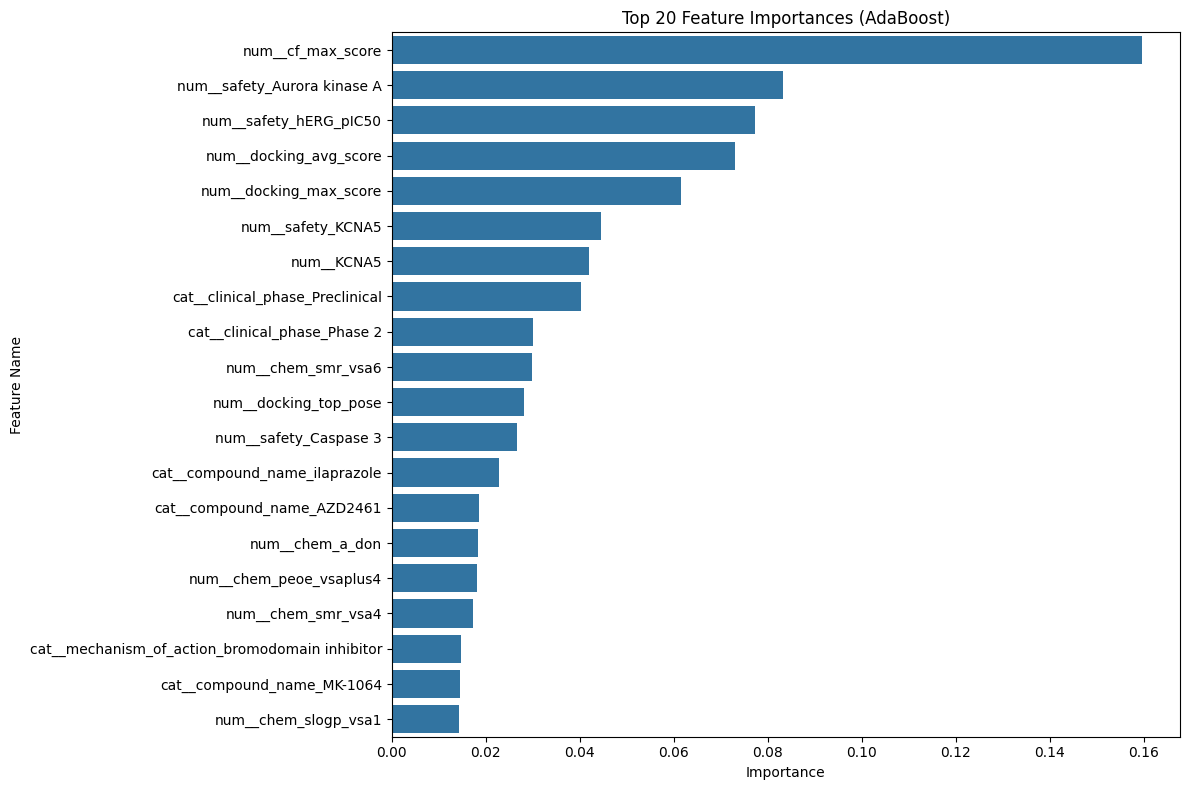


--- Summed Importance for Original Categorical Features ---
Total Importance for 'compound_name': 0.1339
Total Importance for 'clinical_phase': 0.0702
Total Importance for 'mechanism_of_action': 0.0319


In [28]:

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
y = data_less_null['high_potential']
X = data_less_null.drop(columns=['high_potential'])

print("Original class distribution:")
print(y.value_counts())
print("-" * 30)

# --- 2. Identify Column Types (using your actual column names as provided) ---
numerical_cols = ['cf_max_score', 'cf_avg_score', 'cf_top_pose', 'docking_max_score', 'docking_avg_score', 'docking_top_pose', 'safety_Aurora kinase A', 'safety_Bile Salt Export Pump model 2', 'safety_Caspase 3', 'safety_Cathepsin L1', 'safety_hERG_pIC50', 'safety_KCNA5', 'safety_Muscarinic acetylcholine receptor M1', 'safety_Muscarinic acetylcholine receptor M3', 'hERG_pIC50', 'KCNA5', 'pk_Human microsomal clearance model 2', 'chem_a_acc', 'chem_a_don', 'chem_chi0', 'chem_chi1', 'chem_chi0_c', 'chem_chi1_c', 'chem_kier1', 'chem_lip_acc', 'chem_npr1', 'chem_peoe_pcplus', 'chem_peoe_vsaplus0', 'chem_peoe_vsaplus2', 'chem_peoe_vsaplus4', 'chem_peoe_vsaplus6', 'chem_peoe_vsaminus1', 'chem_peoe_vsaminus3', 'chem_peoe_vsaminus5', 'chem_pmi', 'chem_pmi2', 'chem_pmix', 'chem_pmiz', 'chem_slogp', 'chem_slogp_vsa1', 'chem_slogp_vsa3', 'chem_slogp_vsa5', 'chem_slogp_vsa7', 'chem_slogp_vsa9', 'chem_smr_vsa0', 'chem_smr_vsa2', 'chem_smr_vsa4', 'chem_smr_vsa6', 'chem_tpsa', 'cv_safety_score']
categorical_cols = ['compound_name', 'clinical_phase', 'mechanism_of_action']

# A quick check for robust column identification in case of slight mismatches
# (useful if you ran dummy data generation previously and now use real data)
if not set(numerical_cols).issubset(X.columns) or not set(categorical_cols).issubset(X.columns):
    print("\nWarning: Provided numerical/categorical column lists do not perfectly match X.columns.")
    print("Re-identifying columns based on DataFrame dtypes.")
    numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    print(f"Re-identified Numerical columns: {numerical_cols}")
    print(f"Re-identified Categorical columns: {categorical_cols}")

print("-" * 30)

# --- 3. Create Preprocessing Steps (ColumnTransformer) ---
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# --- 4. Define the Model and Pipeline ---
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('adaboost', AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42))
])

# --- 5. Train the pipeline on the full dataset to get feature importances ---
# It's important to train on the full data AFTER cross-validation
# to get a single, final model for feature importance.
print("Training final model on full dataset to extract feature importances...")
pipeline.fit(X, y)

# --- 6. Extract Feature Importances ---

# Access the AdaBoost model from the pipeline
adaboost_model = pipeline.named_steps['adaboost']

# Get feature importances
importances = adaboost_model.feature_importances_

# Get feature names after preprocessing using .get_feature_names_out()
try:
    feature_names_out = pipeline.named_steps['preprocessor'].get_feature_names_out()
except AttributeError:
    # Fallback for older scikit-learn versions (<1.0) or if method is not available
    # This manual reconstruction is more complex and might not cover all edge cases
    # (e.g., remainder='passthrough' columns not explicitly in numerical_cols)
    print("Warning: .get_feature_names_out() not found for preprocessor. Falling back to manual inference.")
    
    transformed_numerical_features = numerical_cols
    
    # Get one-hot encoded feature names
    ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    # Ensure categorical_cols used here are the original ones fed to OHE
    ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
    
    # Combine numerical and one-hot encoded names.
    # If remainder='passthrough' was active and there were other columns, they'd need to be added.
    # For this specific setup, they are either numerical or categorical.
    feature_names_out = transformed_numerical_features + list(ohe_feature_names)


# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names_out,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# --- 7. Display and Plot Feature Importances ---
print("\nTop 20 Feature Importances (AdaBoost Model):")
print(feature_importance_df.head(20))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances (AdaBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

# --- Optional: Sum importance for original categorical features ---
print("\n--- Summed Importance for Original Categorical Features ---")
for cat_col in categorical_cols:
    # Filter for features that belong to this original categorical column
    # They will be named like 'cat__original_col_category_value'
    relevant_importances = feature_importance_df[
        feature_importance_df['Feature'].str.startswith(f'cat__{cat_col}_')
    ]
    if not relevant_importances.empty:
        print(f"Total Importance for '{cat_col}': {relevant_importances['Importance'].sum():.4f}")
    else:
        print(f"No one-hot encoded features found for '{cat_col}'.")

# gradeitn boost

Original class distribution:
high_potential
0    6332
1      41
Name: count, dtype: int64
------------------------------
------------------------------
Performing 5-fold stratified cross-validation with preprocessing, SMOTE, and Gradient Boosting...

--- Fold 1/5 ---
Training class distribution:
high_potential
0    5065
1      33
Name: count, dtype: int64
Testing class distribution:
high_potential
0    1267
1       8
Name: count, dtype: int64

Classification Report (Fold 1):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1267
           1       0.30      0.88      0.45         8

    accuracy                           0.99      1275
   macro avg       0.65      0.93      0.72      1275
weighted avg       0.99      0.99      0.99      1275

Confusion Matrix (Fold 1):
[[1251   16]
 [   1    7]]
Accuracy (Fold 1): 0.9867
AUC-ROC (Fold 1): 0.9952

--- Fold 2/5 ---
Training class distribution:
high_potential
0    5065
1      33
Name: 

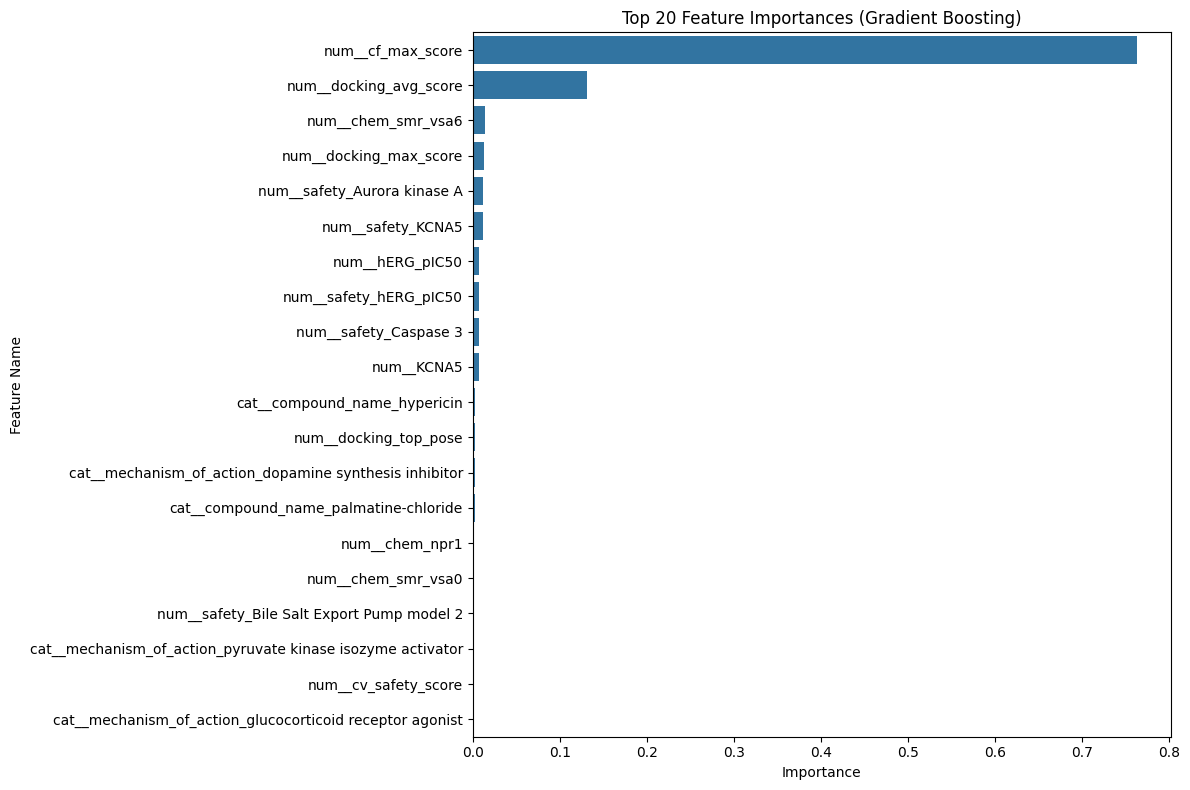


--- Summed Importance for Original Categorical Features ---
Total Importance for 'compound_name': 0.0102
Total Importance for 'clinical_phase': 0.0003
Total Importance for 'mechanism_of_action': 0.0052


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier # Changed from AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

y = data_less_null['high_potential']
X = data_less_null.drop(columns=['high_potential'])

print("Original class distribution:")
print(y.value_counts())
print("-" * 30)

# --- 2. Identify Column Types (using your actual column names from problem description) ---
# Ensure these lists accurately reflect the columns in your X DataFrame
numerical_cols = ['cf_max_score', 'cf_avg_score', 'cf_top_pose', 'docking_max_score', 'docking_avg_score', 'docking_top_pose', 'safety_Aurora kinase A', 'safety_Bile Salt Export Pump model 2', 'safety_Caspase 3', 'safety_Cathepsin L1', 'safety_hERG_pIC50', 'safety_KCNA5', 'safety_Muscarinic acetylcholine receptor M1', 'safety_Muscarinic acetylcholine receptor M3', 'hERG_pIC50', 'KCNA5', 'pk_Human microsomal clearance model 2', 'chem_a_acc', 'chem_a_don', 'chem_chi0', 'chem_chi1', 'chem_chi0_c', 'chem_chi1_c', 'chem_kier1', 'chem_lip_acc', 'chem_npr1', 'chem_peoe_pcplus', 'chem_peoe_vsaplus0', 'chem_peoe_vsaplus2', 'chem_peoe_vsaplus4', 'chem_peoe_vsaplus6', 'chem_peoe_vsaminus1', 'chem_peoe_vsaminus3', 'chem_peoe_vsaminus5', 'chem_pmi', 'chem_pmi2', 'chem_pmix', 'chem_pmiz', 'chem_slogp', 'chem_slogp_vsa1', 'chem_slogp_vsa3', 'chem_slogp_vsa5', 'chem_slogp_vsa7', 'chem_slogp_vsa9', 'chem_smr_vsa0', 'chem_smr_vsa2', 'chem_smr_vsa4', 'chem_smr_vsa6', 'chem_tpsa', 'cv_safety_score']
categorical_cols = ['compound_name', 'clinical_phase', 'mechanism_of_action']

# Robust check: If any columns are missing from X, adjust the lists
# This is crucial if your actual data_less_null doesn't have all these columns.
existing_numerical_cols = [col for col in numerical_cols if col in X.columns]
missing_numerical_cols = [col for col in numerical_cols if col not in X.columns]
if missing_numerical_cols:
    print(f"Warning: Numerical columns not found in X: {missing_numerical_cols}")
numerical_cols = existing_numerical_cols

existing_categorical_cols = [col for col in categorical_cols if col in X.columns]
missing_categorical_cols = [col for col in categorical_cols if col not in X.columns]
if missing_categorical_cols:
    print(f"Warning: Categorical columns not found in X: {missing_categorical_cols}")
categorical_cols = existing_categorical_cols

if not numerical_cols and not categorical_cols:
    print("Error: No numerical or categorical columns identified from your lists. Auto-detecting columns.")
    numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
    print(f"Auto-detected Numerical columns: {numerical_cols}")
    print(f"Auto-detected Categorical columns: {categorical_cols}")


print("-" * 30)

# --- 3. Create Preprocessing Steps (ColumnTransformer) ---
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# --- 4. Define the Model and Pipeline ---
# Use GradientBoostingClassifier this time
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('gradientboost', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
    # n_estimators: Number of boosting stages
    # learning_rate: Shrinks the contribution of each tree
    # max_depth: Limits the depth of each individual tree (often kept small for GB)
])

# --- 5. Set up Cross-Validation ---
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# --- 6. Perform Cross-Validation (Training and Predicting) ---
print(f"Performing {n_splits}-fold stratified cross-validation with preprocessing, SMOTE, and Gradient Boosting...")

all_y_true = []
all_y_pred = []
all_y_proba = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"\n--- Fold {fold+1}/{n_splits} ---")
    print("Training class distribution:")
    print(y_train.value_counts())
    print("Testing class distribution:")
    print(y_test.value_counts())

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    all_y_proba.extend(y_proba)

    print("\nClassification Report (Fold {}):".format(fold+1))
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Confusion Matrix (Fold {}):".format(fold+1))
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy (Fold {}): {:.4f}".format(fold+1, accuracy_score(y_test, y_pred)))
    try:
        auc_roc = roc_auc_score(y_test, y_proba)
        print("AUC-ROC (Fold {}): {:.4f}".format(fold+1, auc_roc))
    except ValueError:
        print("AUC-ROC (Fold {}): Not applicable (only one class present in y_true_proba)".format(fold+1))

# --- 7. Overall Evaluation (Aggregated across all folds) ---
print("\n" + "=" * 30)
print("Overall Performance Across All Folds:")
print(classification_report(all_y_true, all_y_pred, zero_division=0))
print("Confusion Matrix (Overall):")
print(confusion_matrix(all_y_true, all_y_pred))
print("Overall Accuracy: {:.4f}".format(accuracy_score(all_y_true, all_y_pred)))
try:
    overall_auc_roc = roc_auc_score(all_y_true, all_y_proba)
    print("Overall AUC-ROC: {:.4f}".format(overall_auc_roc))
except ValueError:
    print("Overall AUC-ROC: Not applicable (only one class present in overall y_true_proba)")
overall_f1_minority = f1_score(all_y_true, all_y_pred, pos_label=1, zero_division=0)
print(f"Overall F1-Score (Minority Class 1): {overall_f1_minority:.4f}")

# --- 8. Feature Importance for the Gradient Boosting Model ---
print("\n" + "=" * 30)
print("Extracting Feature Importances for Gradient Boosting Model...")

# Train the pipeline on the full dataset one more time to get the final model's importances
# This is typically done after selecting hyperparameters based on CV results.
pipeline.fit(X, y)

# Access the GradientBoostingClassifier model from the pipeline
gb_model = pipeline.named_steps['gradientboost']

# Get feature importances
importances = gb_model.feature_importances_

# Get feature names after preprocessing using .get_feature_names_out()
try:
    feature_names_out = pipeline.named_steps['preprocessor'].get_feature_names_out()
except AttributeError:
    print("Warning: .get_feature_names_out() not found for preprocessor. Falling back to manual inference.")
    transformed_numerical_features = numerical_cols
    ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
    feature_names_out = transformed_numerical_features + list(ohe_feature_names)


# Create a DataFrame for better visualization
feature_importance_df_gb = pd.DataFrame({
    'Feature': feature_names_out,
    'Importance': importances
})

# Sort by importance
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)

# --- 9. Display and Plot Feature Importances ---
print("\nTop 20 Feature Importances (Gradient Boosting Model):")
print(feature_importance_df_gb.head(20))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_gb.head(20))
plt.title('Top 20 Feature Importances (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

# --- Optional: Sum importance for original categorical features ---
print("\n--- Summed Importance for Original Categorical Features ---")
for cat_col in categorical_cols:
    relevant_importances = feature_importance_df_gb[
        feature_importance_df_gb['Feature'].str.startswith(f'cat__{cat_col}_')
    ]
    if not relevant_importances.empty:
        print(f"Total Importance for '{cat_col}': {relevant_importances['Importance'].sum():.4f}")
    else:
        print(f"No one-hot encoded features found for '{cat_col}'.")

In [1]:
47

47